# BEE 4750 Homework 2: Dissolved Oxygen

**Name**: Maya Yu

**ID**: mzy3

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/hw02-mayazoeyu`


In [3]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.55 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [3]:
### Problem 1 Model ###

### Define constant variables 
U = 6 # River velocity 
ka = 0.55 # Reaeration constant 
kb = 0.35 # CBOD decay rate 
kn = 0.25 # NBOD decay rate 
Cs = 10 # Saturated DO concentration 

### Define function to calculate DO concentration d km downstream from the first wastewater discharge location 

### This function acccepts x (distance in km), treatment_1, treatment_2
### (% removed organic waste from streams 1 and 2), and DO_river (the initial DO concentration in the river)
function dissolved_oxygen(x, treatment_1, treatment_2, DO_river)
    # Calculate initial DO concentration, CBOD, and NBOD
    C0 = (100000*DO_river + 10000*5)/(100000+10000)
    B0 = (100000*5 + 10000*(1-treatment_1)*50)/(100000+10000)
    N0 = (100000*5 + 10000*(1-treatment_1)*35)/(100000+10000)

    # Check if distance is less than 15 km 
    if x < 15
        # Calculate alphas
        α1 = exp(-ka*x/U)
        α2 = (kb/(ka-kb))*(exp(-kb*x/U)-exp(-ka*x/U))
        α3 = (kn/(ka-kn))*(exp(-kn*x/U)-exp(-ka*x/U))

        # Calculate concentration
        C = Cs*(1-α1)+(C0*α1)-(B0*α2)-(N0*α3)

    # Check if distance is greater than 15 km 
    else 
        # Determine the river's DO concentration, CBOD, and NBOD at d=15
        y = 15 
        α1_river_15 = exp(-ka*y/U)
        α2_river_15 = (kb/(ka-kb))*(exp(-kb*y/U)-exp(-ka*y/U))
        α3_river_15 = (kn/(ka-kn))*(exp(-kn*y/U)-exp(-ka*y/U))
        C15_river = Cs*(1-α1_river_15)+(C0*α1_river_15)-(B0*α2_river_15)-(N0*α3_river_15)
        B15_river = B0*exp(-kb*y/U)
        N15_river = N0*exp(-kn*y/U)
        
        # Calculate mixed DO concentration, CBOD, and NBOD after wastewater discharge plant 2
        C15 = (110000*C15_river + 15000*5)/(110000+15000)
        B15 = (110000*B15_river + 15000*(1-treatment_2)*45)/(110000+15000)
        N15 = (110000*N15_river + 15000*(1-treatment_2)*35)/(110000+15000)

        # Re-initialize alphas 
        α1 = exp(-ka*(x-15)/U)
        α2 = (kb/(ka-kb))*(exp(-kb*(x-15)/U)-exp(-ka*(x-15)/U))
        α3 = (kn/(ka-kn))*(exp(-kn*(x-15)/U)-exp(-ka*(x-15)/U))

        # Calculate concentration based on distance 
        C = Cs*(1-α1)+(C15*α1)-(B15*α2)-(N15*α3)
    end
     return C
end

# Find minimum DO concentration given no treatments and the river's initial DO concentration of 7.5 mg/L
x = 0:50
C = (a -> dissolved_oxygen(a, 0, 0, 7.5)).(x);
C_max = findmin(C)


(3.757481773041718, 23)

#### Problem 1: Minimum Concentration 
Based on the above code, we see that the minimum DO concentration is approximately 3.76 mg/L. This occurs at d=22. The output of the above code demonstrates the index where the minimum concentration occurs. As such, the array's index of 1 represents a distance of 0. 

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

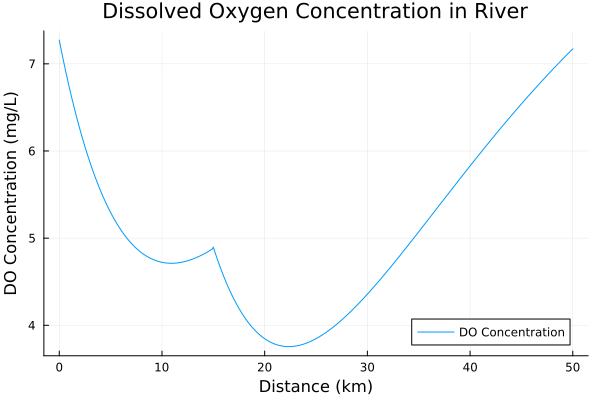

In [5]:
### Problem 2 Plot ### 

# Find and store DO concentrations in the river from 0 to 50 km 
x = 0:0.1:50
C = (a -> dissolved_oxygen(a, 0, 0, 7.5)).(x);

# Create graph of DO concentrations from 0 to 50 km 
plot(x, C, title = "Dissolved Oxygen Concentration in River", xlabel = "Distance (km)", 
    ylabel = "DO Concentration (mg/L)", label = "DO Concentration")

#### Problem 2: Plot Observations
From the graph, I noticed that the DO concentration significantly decreases at d=15 km due to waste stream 2. In addition, it is worth nothing that the maximum DO concentrations will occur at either extremes of the graph: d=0 or d=50 km. It is also worth nothing that there is no severe discontinuity at d=15 km. This may be because the mixing concentration is not significantly different between the two waste streams – thereby leading to a less severe discontinuity. Lastly, we see that the minimum concentration occurs roughly at d=22 km – which is consistent with our findings from Problem 1. 

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

In [6]:
### Problem 3 ###

### Create a function that determine the distance from waste stream 2 in which the DO concentration recovers to a concentration Y mg/L 
function distance_from_2(Y)
    # Initialize distance DO concentration at d=15
    x = 15
    C = dissolved_oxygen(x, 0, 0, 7.5)

    # Create while loop that runs until a concentration Y is achieved 
    while (C < Y) 
        x = x+0.1 
        C = dissolved_oxygen(x, 0, 0, 7.5)
    end
# Return the distance from waste stream 2 
return x-15
end

# Determine distance from waste stream 2 where the DO concentration recovers to 6 mg/L
distance_from_2(6)

26.20000000000035

#### Problem 3: Distance from Waste Stream 2
The distance from waste stream 2 that would be required for the DO concentration of the river to recover to 6 mg/L is approximately 26.2 km. 


### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

In [7]:
### Problem 4 ###
# Initialize while loop conditions 
treatment_2 = 0
C_min = -Inf

# Create while loop that is executed until the DO Concentration is greater than 4 mg/L
while (C_min[1] <= 4)
    treatment_2 = treatment_2+0.015
    x = 0:50
    C = (a -> dissolved_oxygen(a, 0, treatment_2, 7.5)).(x)
    C_min = findmin(C)
end

# Return the required removal rate for waste stream 2
return treatment_2

0.12

#### Problem 4: Minimum Treatment
The minimum treatment required for waste stream 2 to ensure that the DO concentration never drops below 4 mg/L is 12%. Therefore, 12% of the organic waste in waste stream 2 must be removed to ensure the DO concentration does not drop below 4 mg/L. 

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

In [8]:
### Problem 5 ###
# Initialize while loop conditions
treatment = 0
C_min = -Inf

# Create while loop that is executed until the DO Concentration is greater than 4 mg/L
while (C_min[1] < 4)
    treatment = treatment+0.01
    x = 0:50
    C = (a -> dissolved_oxygen(a, treatment, treatment, 7.5)).(x)
    C_min = findmin(C)
end

# Return the required removal rate for both waste streams
return treatment

0.07

#### Problem 5: Minimum Treatment
The minimum treatment required for waste stream 2 to ensure that the DO concentration never drops below 4 mg/L is 7%. Therefore, 7% of the organic waste in both waste streams must be removed to ensure the DO concentration does not drop below 4 mg/L.

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

#### Problem 6 Answer
I would opt to treat both waste streams equally. Both waste streams are responsible for reducing the DO concentration in the river's water; therefore, it would not be fair if only one waste stream is punished for discharging their waste. In addition, if waste stream 1 wasn't present, it is possible that waste stream 2 would always comply with regulatory standards. However, to make a final conclusion, it would be important to note each site's ability (both financially and technologically) to facilitate waste treatment facilities on their site. For instance, would the creation of a waste treatment facility be relatively more costly for waste stream 2? Do both plants have the budget to enact these treatment options? How quickly could these treatment options be implemented?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

In [9]:
### Problem 7 Model ###

# Initialize counter
count = 0 
treatment = 0.07
iterations = 6:0.1:8

# Create for loop that determines how many instances the DO concentration fails to comply with regulation
for DO in 6:0.1:8
    x = 0:0.1:50
    C = (a -> dissolved_oxygen(a, treatment, treatment, DO)).(x)
    C_min = findmin(C)  
    # Check when C_min is less than 4 (fails to comply)
    if C_min[1] < 4
        count = count + 1
    end
end
# Return the probability that the treatment plans fail to comply
return count/(length(iterations))*100

66.66666666666666

#### Problem 7: Probability of Failure
The treatment option in Problem 5 would fail around 67% of the time if the DO concentration of the river varies uniformly from 6-8 mg/L. 

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

In [49]:
# Calculate N, B for every distance after 15. Run dissolved oxygen for (x, 0.07, 0.07). Calculate mixing for each distance. Model alphas and calculate C(x) from index to 50. 
# Take C_min. If C_min >= 4 break (9.4 km)

### Define constants 
treatment = 0.07
U = 6 # River velocity 
ka = 0.55 # Reaeration constant 
kb = 0.35 # CBOD decay rate 
kn = 0.25 # NBOD decay rate 
Cs = 10 # Saturated DO concentration 
B15 = 8.240174791918085
N15 = 7.440866473939411

### Create for loop that models mixing with waste stream 3 at every d after 15
function dissolved_oxygen_3(x, z)
    # Calculate C, N, and B at that distance
    C_conc = dissolved_oxygen(z, treatment, treatment, 7.5)
    B_conc = B15*exp(-kb*(z-15)/U)
    N_conc = N15*exp(-kn*(z-15)/U)

    # Simulate mixing at this point 
    C_mix = (125000*C_conc+5000*4.5)/(125000+5000)
    B_mix = (125000*B_conc+5000*50)/(125000+5000)
    N_mix = (125000*N_conc+5000*45)/(125000+5000)
    
    α1 = exp(-ka*(x-z)/U)
    α2 = (kb/(ka-kb))*(exp(-kb*(x-z)/U)-exp(-ka*(x-z)/U))
    α3 = (kn/(ka-kn))*(exp(-kn*(x-z)/U)-exp(-ka*(x-z)/U))
    C_final= Cs*(1-α1)+(C_mix*α1)-(B_mix*α2)-(N_mix*α3)

    return C_final
end

C_min = -Inf
z = 15

while C_min[1] < 4
    x = 15:0.1:50
    C = (a -> dissolved_oxygen_3(a, z)).(x)
    C_min = findmin(C)
    z = z + 0.01
end
return z-15

10.040000000001392

#### Problem 8: Distance from Waste Stream 2
In order to ensure the DO concentration of the river always complies with the given regulatory standard, the third waste stream must be placed approximately 10 km away from waste stream 2. 


## References

List any external references consulted, including classmates.

Caleb Julian-Kwong, Kiley Espineira